
### Description...



## 0) Importing libraries

In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files

## 1) Importing database:




In [2]:
df = pd.read_csv('/content/drive/MyDrive/RNNs_teste/AirPassengers.csv', index_col = 0, parse_dates = True)
df.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [3]:
df.shape

(144, 1)

In [4]:
df.dropna(inplace=True)
len(df)

144

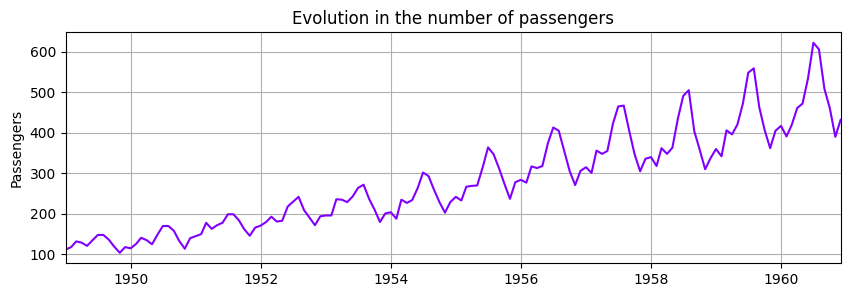

In [5]:
plt.figure(figsize = (10,3))
plt.title('Evolution in the number of passengers')
plt.ylabel('Passengers')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['#Passengers'],color='#8000ff')
plt.show()

## 2) Data processing for training and testing:

In [6]:
#extracting the time series values
y = df['#Passengers'].values.astype(float)

#defining a test size
test_size = 12

#create train and test splits
train_set = y[:-test_size]
test_set = y[-test_size:]
test_set

array([417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

In [7]:
#train_set

In [8]:
from sklearn.preprocessing import MinMaxScaler

# instantiate a scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# normalize the training set
train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

In [9]:
# convert train_norm to a tensor
train_norm = torch.FloatTensor(train_norm).view(-1)

# define a window size
window_size = 12
# define a function to create sequence/label tuples
def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

# apply input_data to train_norm
train_data = input_data(train_norm, window_size)
len(train_data)

120

## 3) Building the LSTM model:




In [11]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # add an LSTM layer:
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)

        # add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)

        # initializing h0 and c0:
        self.hidden = (torch.zeros(self.num_layers, 1,self.hidden_size),
                       torch.zeros(self.num_layers, 1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

## 4) Configuring models for hyperparameters:

In [12]:
# Initialize the LSTM model
input_size = 1
hidden_size = 100
num_layers = 1
output_size = 1
learning_rate = 0.01
epochs = 75
#learning_rate = 0.0002
#model = LSTM(input_size, hidden_size, num_layers, output_size)

In [13]:
torch.manual_seed(42)

# instantiate
model = LSTMnetwork(input_size, hidden_size, num_layers, output_size)

# loss
criterion = nn.MSELoss()

#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

## 5) Training do model:

Epoch:  1 Loss: 0.55892467


<Figure size 1000x300 with 0 Axes>

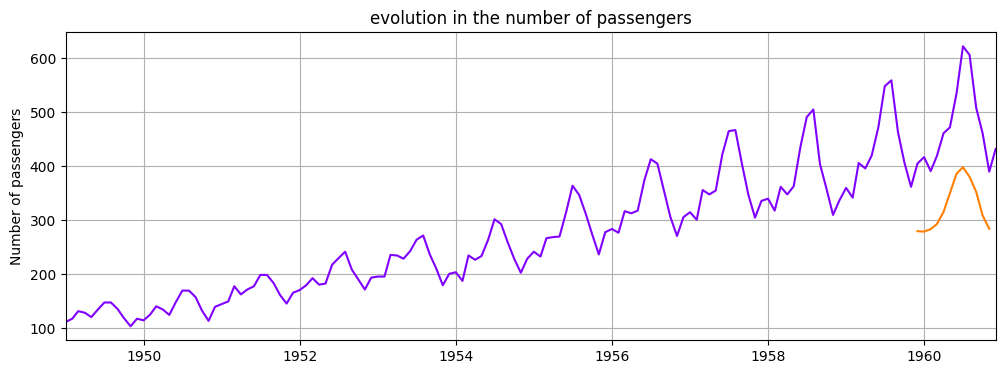

Epoch:  2 Loss: 0.04301777


<Figure size 1000x300 with 0 Axes>

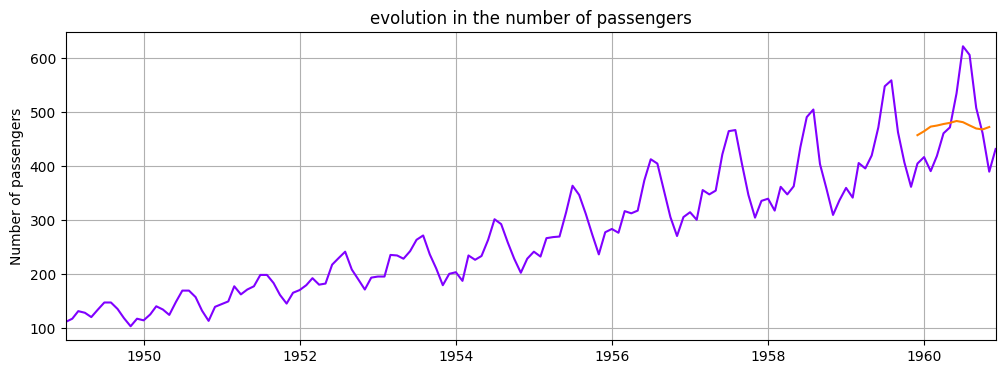

Epoch:  3 Loss: 0.00108310


<Figure size 1000x300 with 0 Axes>

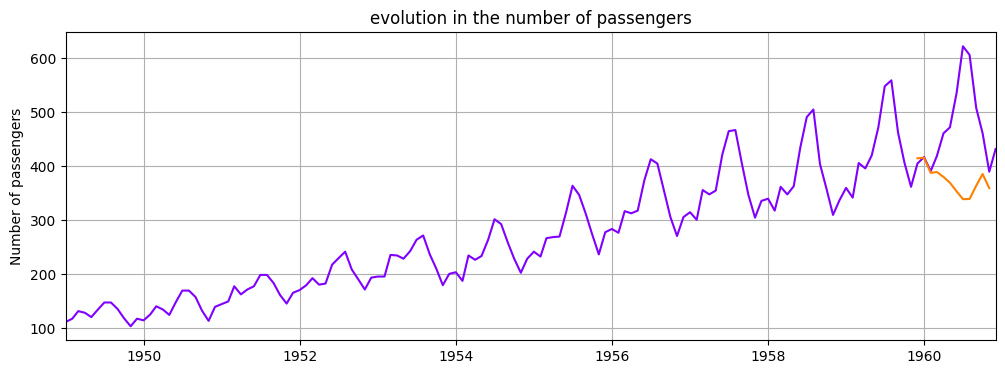

Epoch:  4 Loss: 0.07177757


<Figure size 1000x300 with 0 Axes>

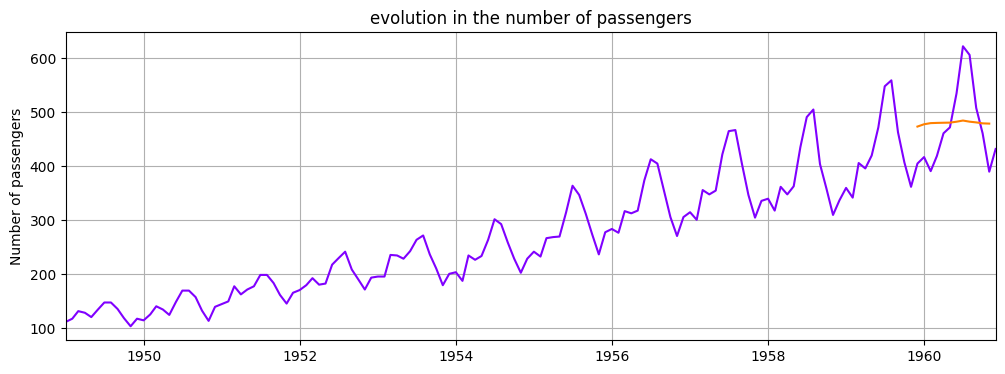

Epoch:  5 Loss: 0.01743316


<Figure size 1000x300 with 0 Axes>

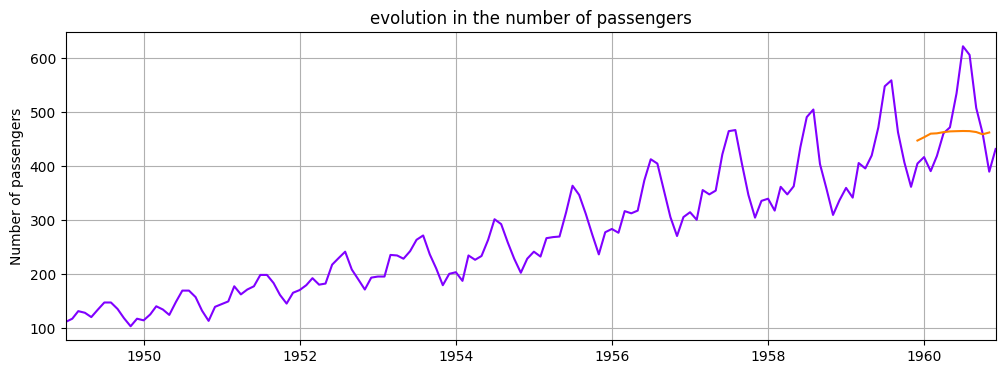

Epoch:  6 Loss: 0.00379460


<Figure size 1000x300 with 0 Axes>

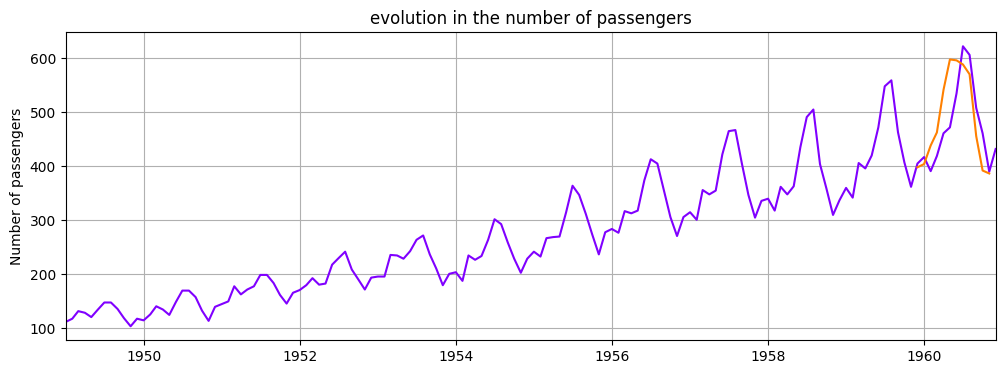

Epoch:  7 Loss: 0.02636227


<Figure size 1000x300 with 0 Axes>

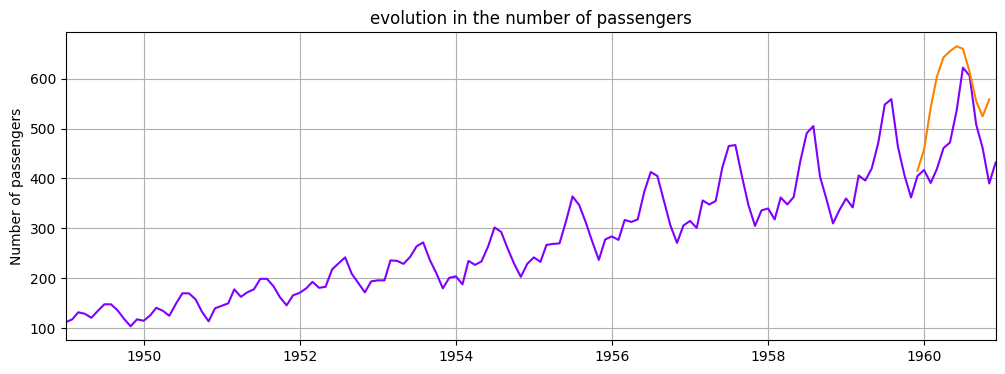

Epoch:  8 Loss: 0.00155861


<Figure size 1000x300 with 0 Axes>

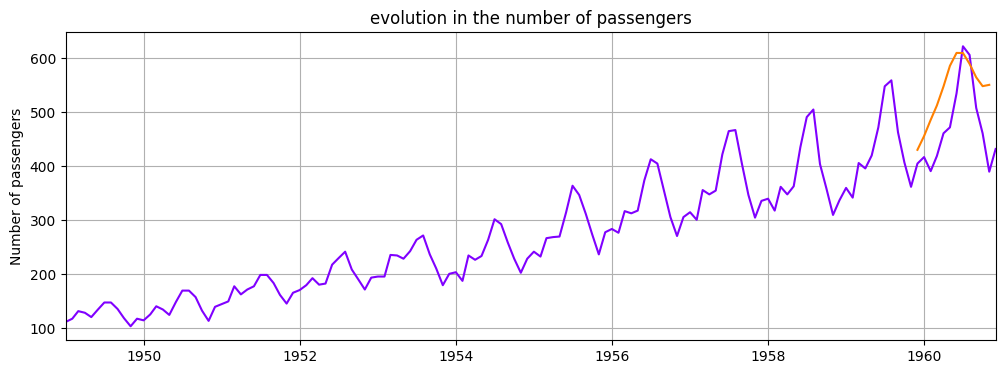

Epoch:  9 Loss: 0.00440187


<Figure size 1000x300 with 0 Axes>

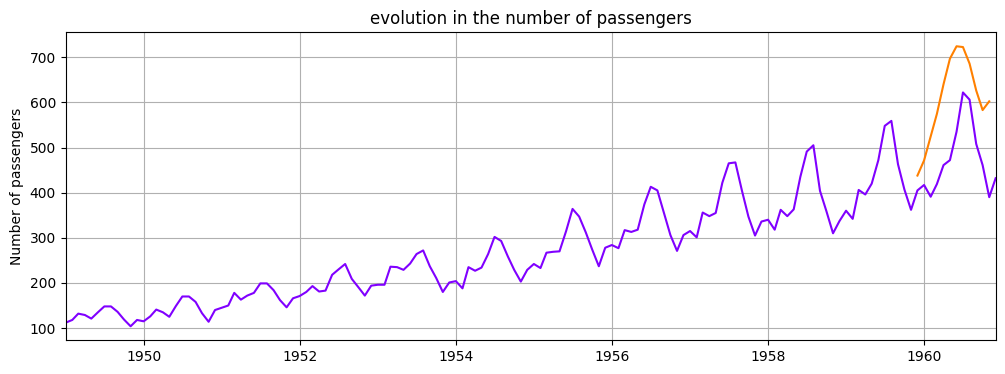

Epoch: 10 Loss: 0.01781413


<Figure size 1000x300 with 0 Axes>

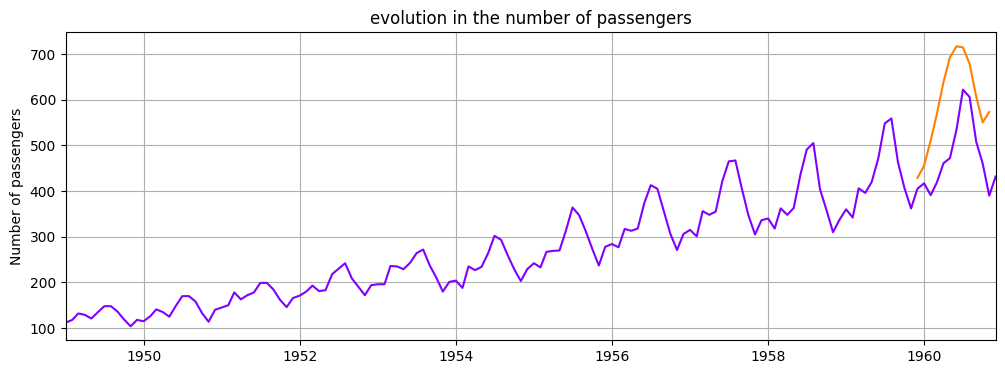

Epoch: 11 Loss: 0.02156910


<Figure size 1000x300 with 0 Axes>

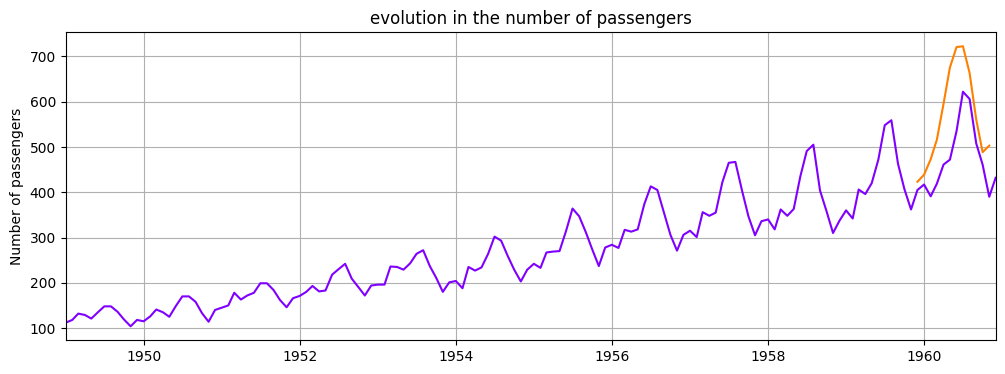

Epoch: 12 Loss: 0.00172505


<Figure size 1000x300 with 0 Axes>

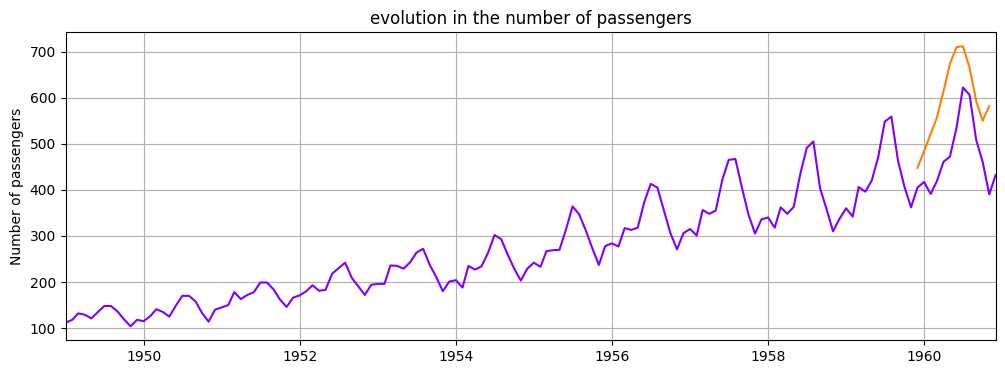

Epoch: 13 Loss: 0.00336777


<Figure size 1000x300 with 0 Axes>

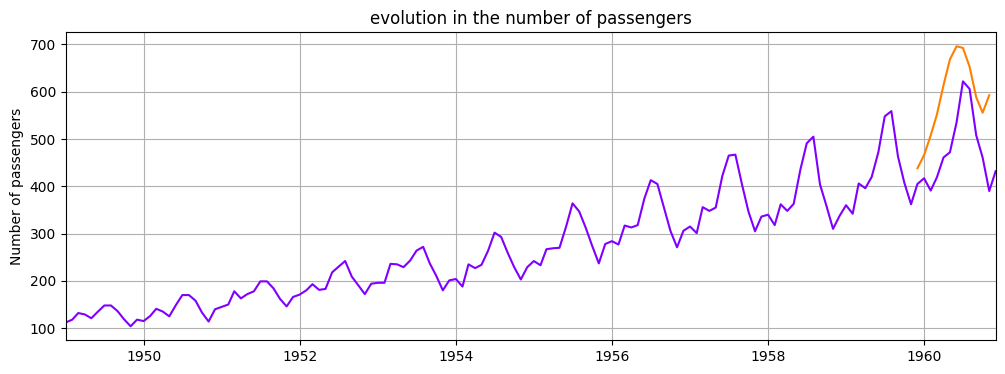

Epoch: 14 Loss: 0.01559137


<Figure size 1000x300 with 0 Axes>

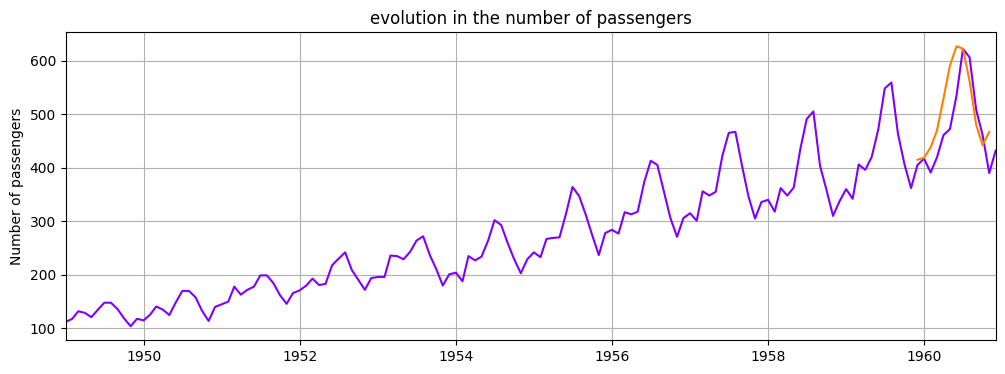

Epoch: 15 Loss: 0.00326532


<Figure size 1000x300 with 0 Axes>

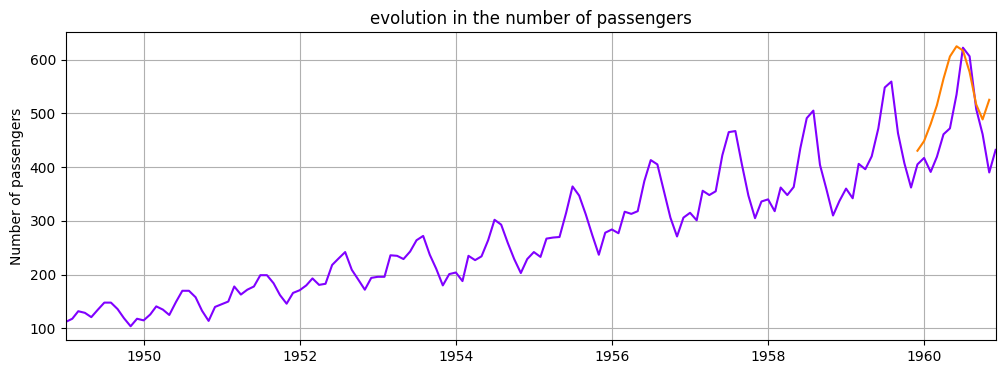

Epoch: 16 Loss: 0.00035837


<Figure size 1000x300 with 0 Axes>

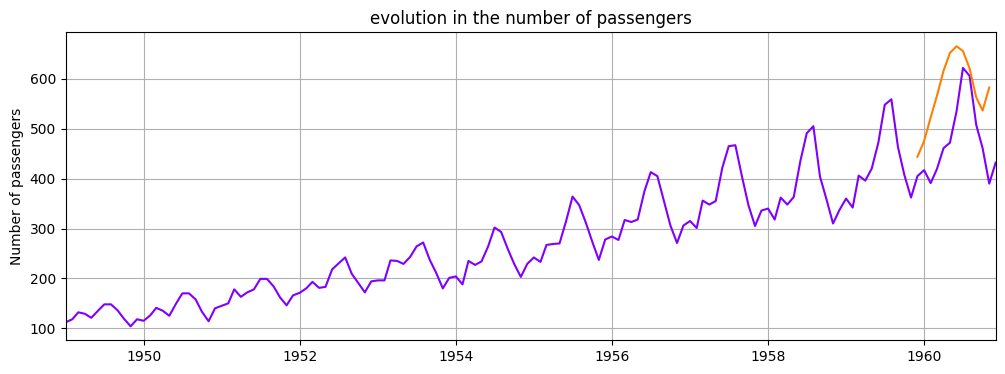

Epoch: 17 Loss: 0.00048558


<Figure size 1000x300 with 0 Axes>

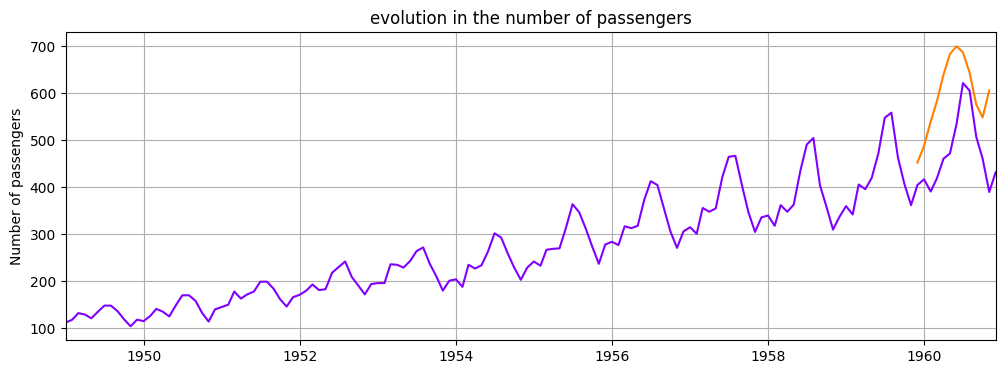

Epoch: 18 Loss: 0.00007254


<Figure size 1000x300 with 0 Axes>

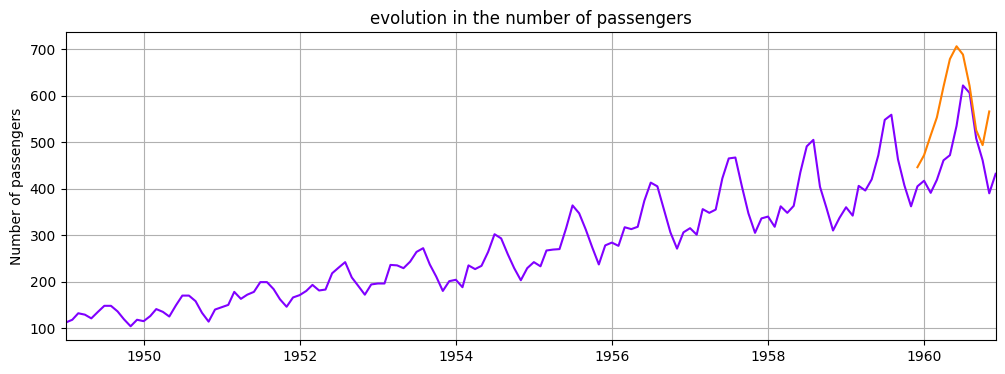

Epoch: 19 Loss: 0.03475061


<Figure size 1000x300 with 0 Axes>

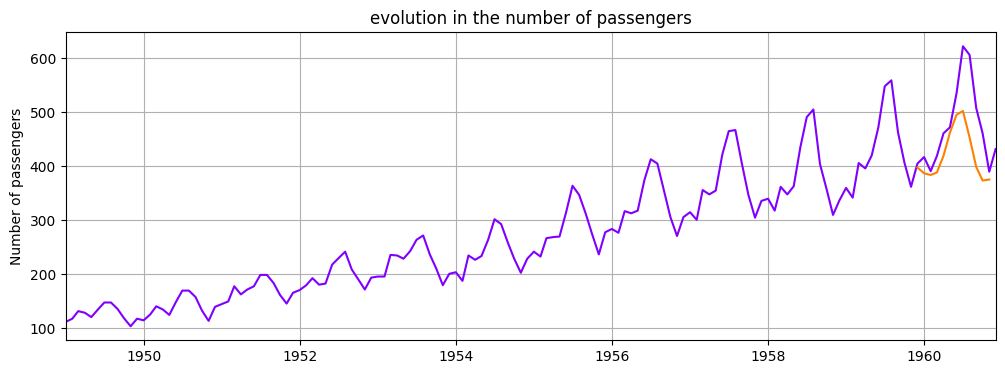

Epoch: 20 Loss: 0.00001629


<Figure size 1000x300 with 0 Axes>

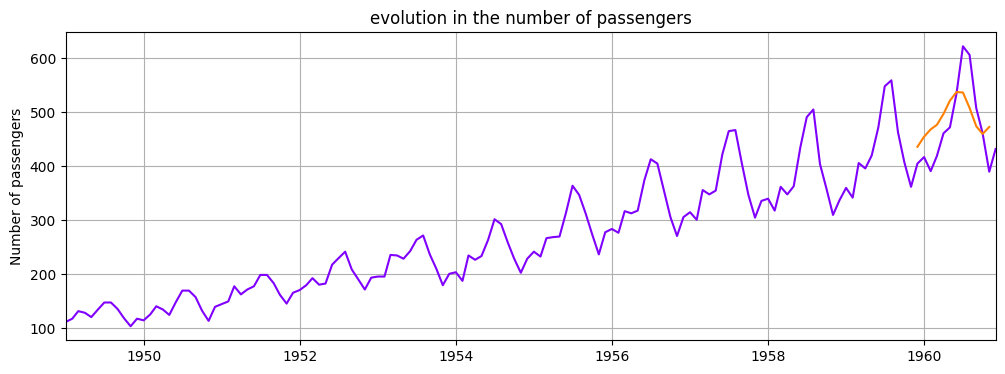

Epoch: 21 Loss: 0.00514266


<Figure size 1000x300 with 0 Axes>

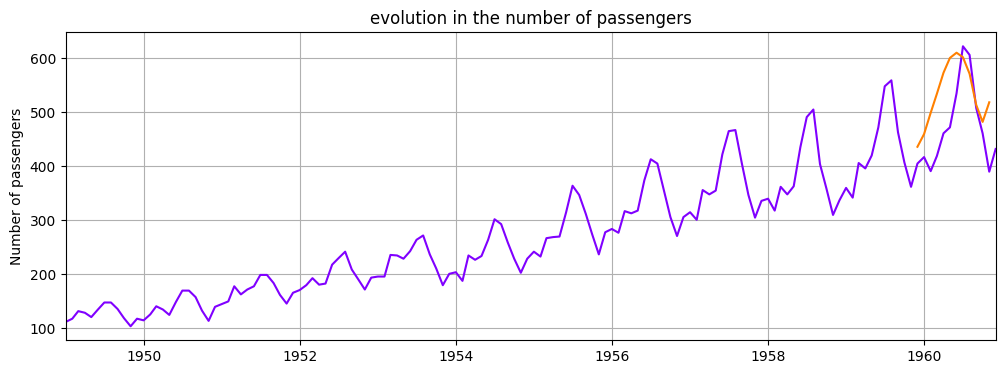

Epoch: 22 Loss: 0.00071006


<Figure size 1000x300 with 0 Axes>

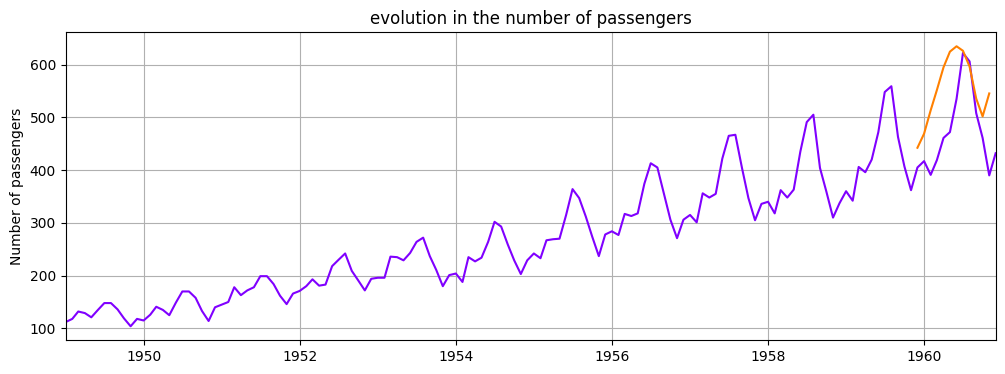

Epoch: 23 Loss: 0.00001315


<Figure size 1000x300 with 0 Axes>

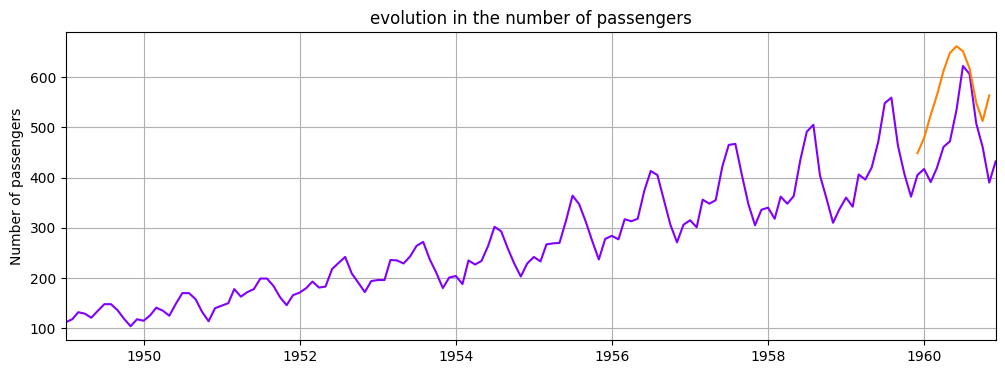

Epoch: 24 Loss: 0.00075696


<Figure size 1000x300 with 0 Axes>

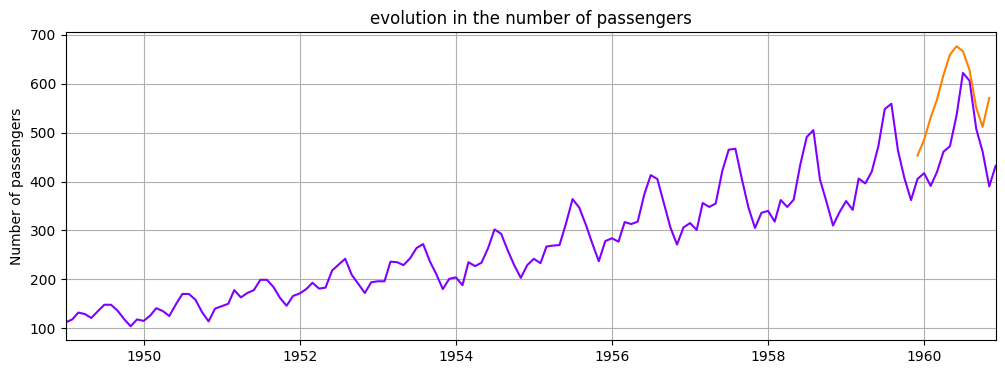

Epoch: 25 Loss: 0.00108391


<Figure size 1000x300 with 0 Axes>

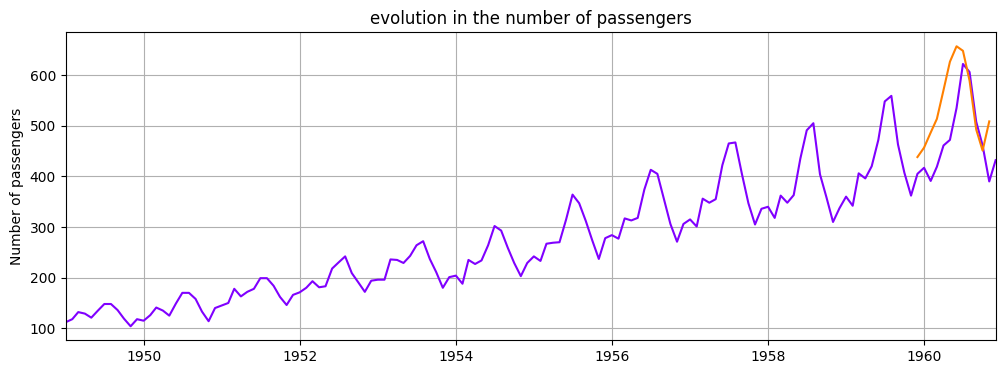

Epoch: 26 Loss: 0.00073372


<Figure size 1000x300 with 0 Axes>

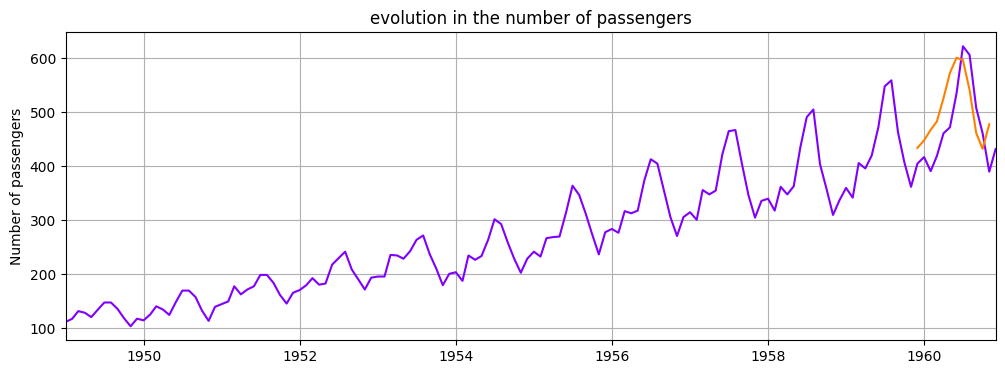

Epoch: 27 Loss: 0.00293727


<Figure size 1000x300 with 0 Axes>

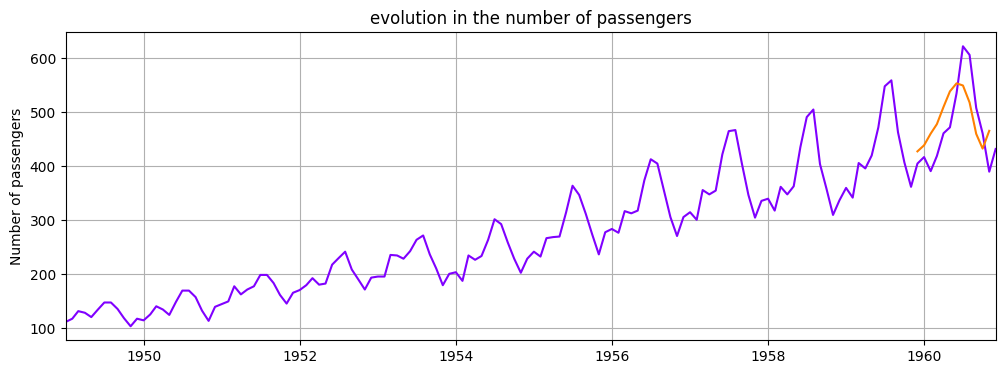

Epoch: 28 Loss: 0.00398913


<Figure size 1000x300 with 0 Axes>

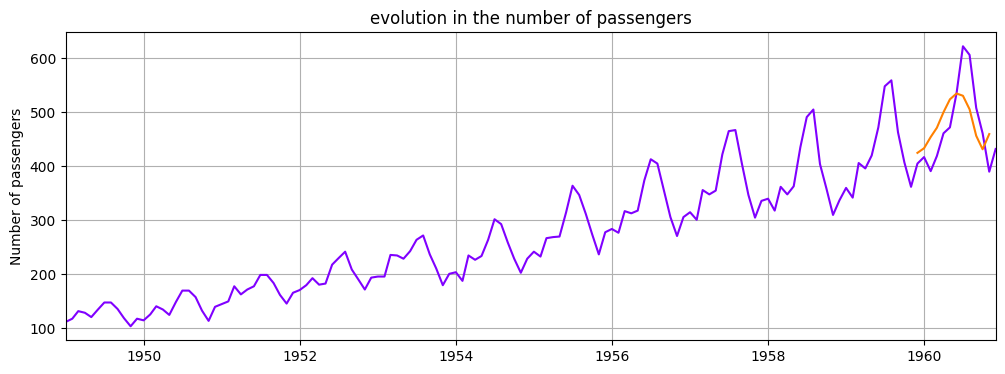

Epoch: 29 Loss: 0.00138423


<Figure size 1000x300 with 0 Axes>

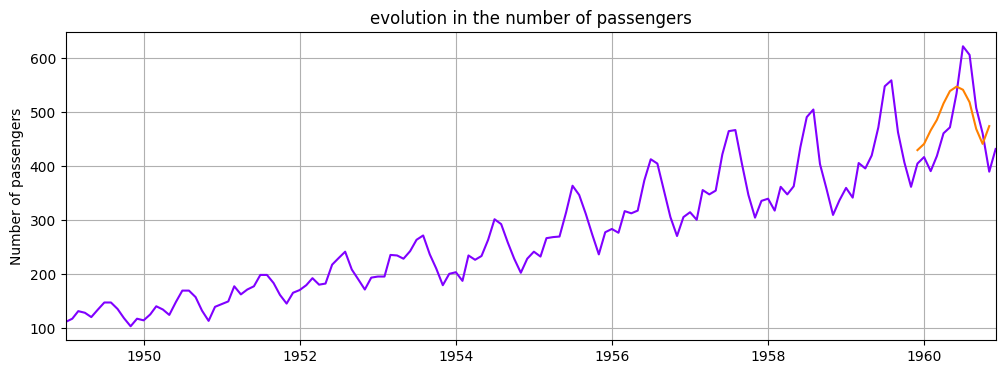

Epoch: 30 Loss: 0.00003713


<Figure size 1000x300 with 0 Axes>

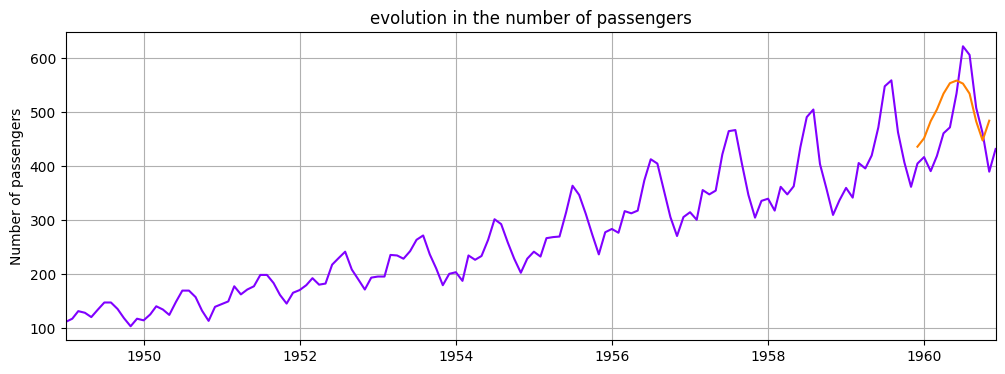

Epoch: 31 Loss: 0.00041929


<Figure size 1000x300 with 0 Axes>

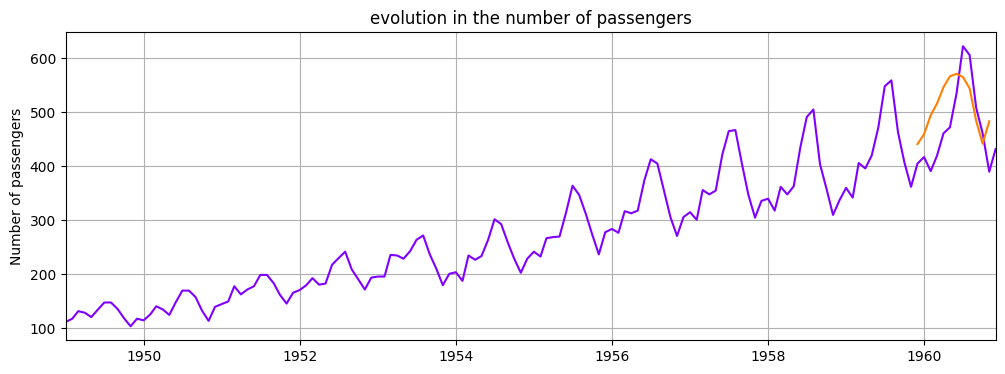

Epoch: 32 Loss: 0.00111656


<Figure size 1000x300 with 0 Axes>

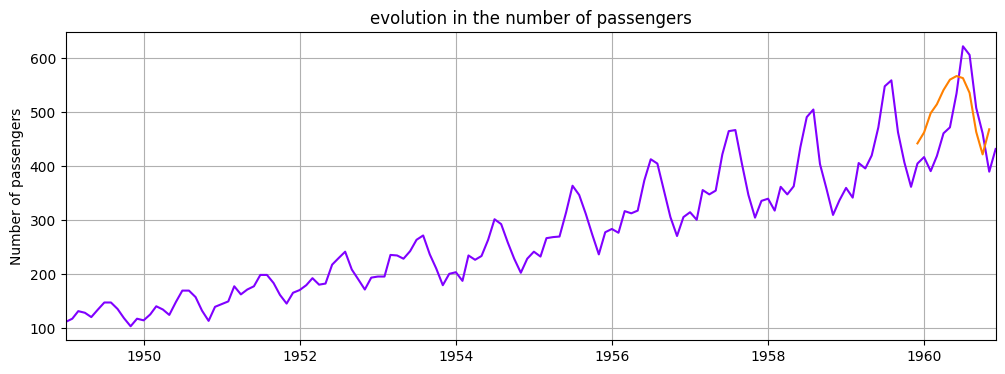

Epoch: 33 Loss: 0.00239197


<Figure size 1000x300 with 0 Axes>

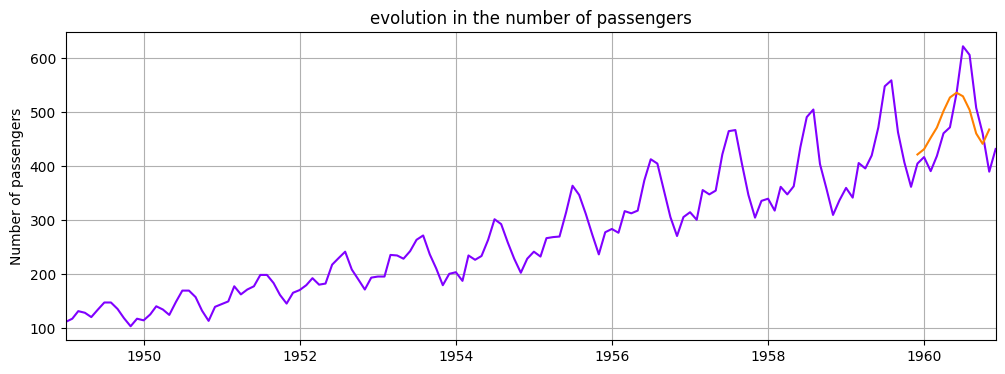

Epoch: 34 Loss: 0.01756779


<Figure size 1000x300 with 0 Axes>

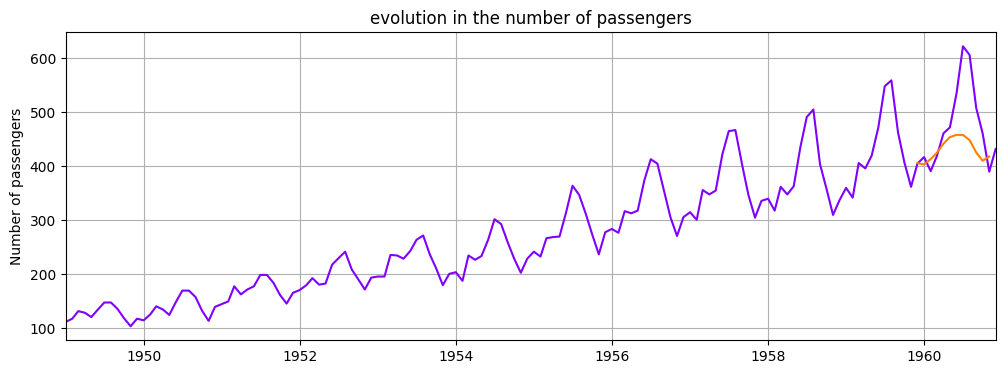

Epoch: 35 Loss: 0.00069002


<Figure size 1000x300 with 0 Axes>

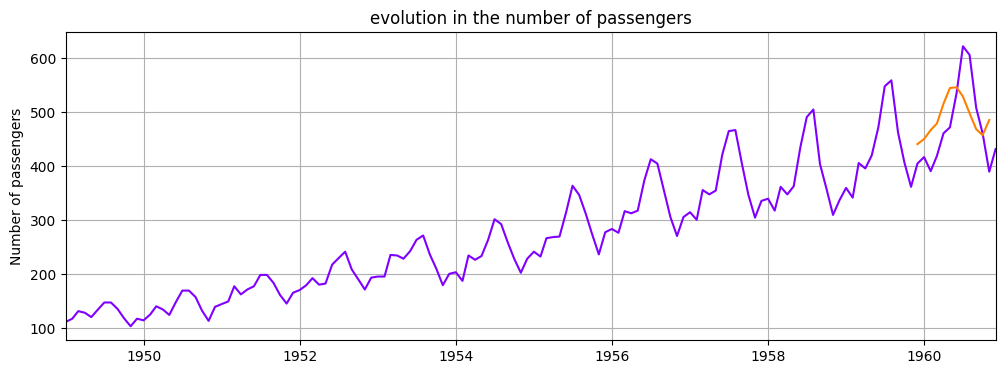

Epoch: 36 Loss: 0.00856356


<Figure size 1000x300 with 0 Axes>

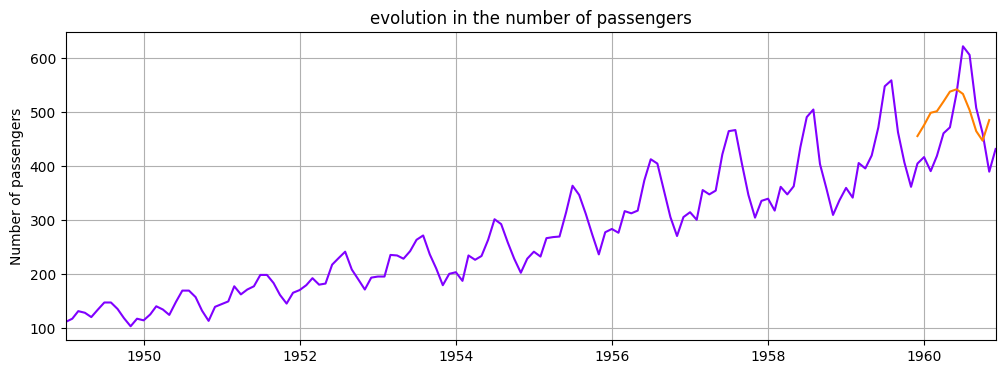

Epoch: 37 Loss: 0.00336233


<Figure size 1000x300 with 0 Axes>

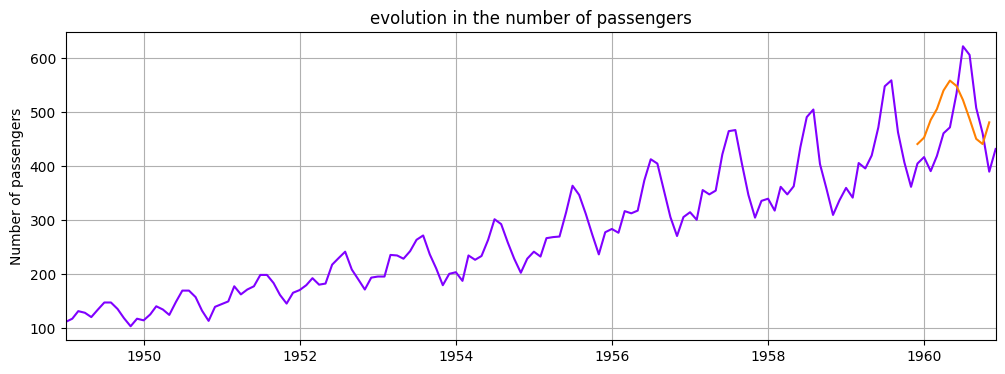

Epoch: 38 Loss: 0.00101889


<Figure size 1000x300 with 0 Axes>

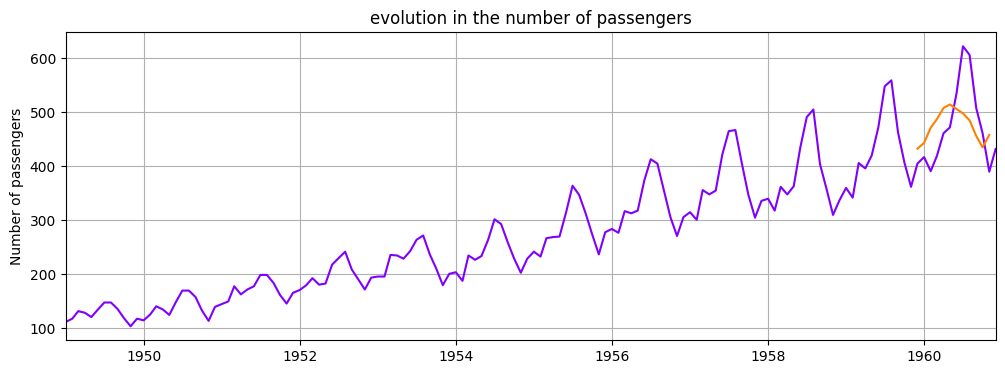

Epoch: 39 Loss: 0.00003223


<Figure size 1000x300 with 0 Axes>

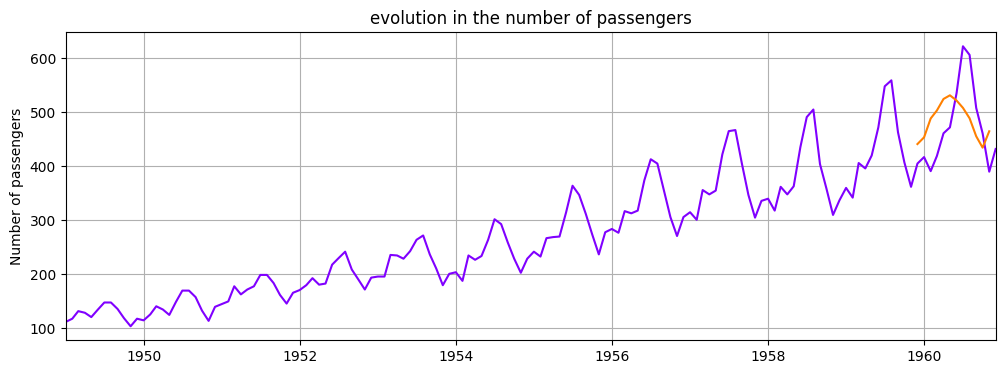

Epoch: 40 Loss: 0.00022138


<Figure size 1000x300 with 0 Axes>

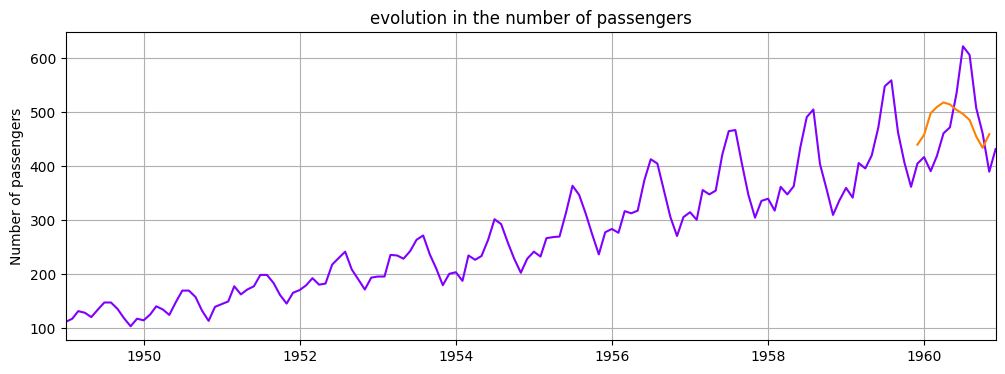

Epoch: 41 Loss: 0.00179757


<Figure size 1000x300 with 0 Axes>

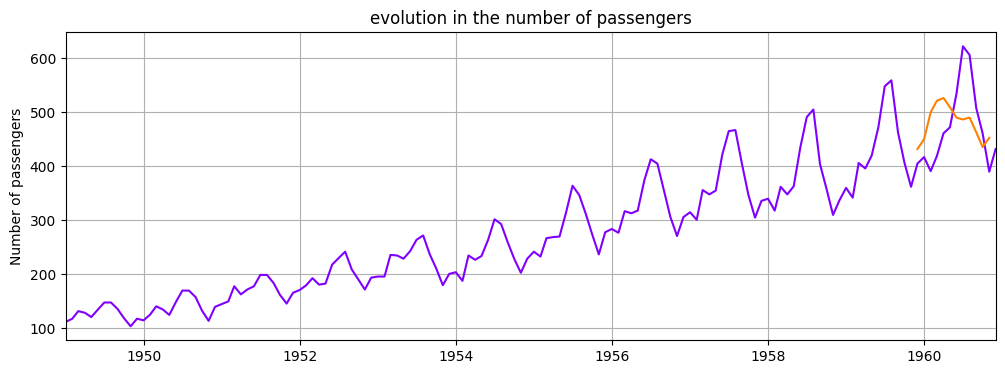

Epoch: 42 Loss: 0.00002506


<Figure size 1000x300 with 0 Axes>

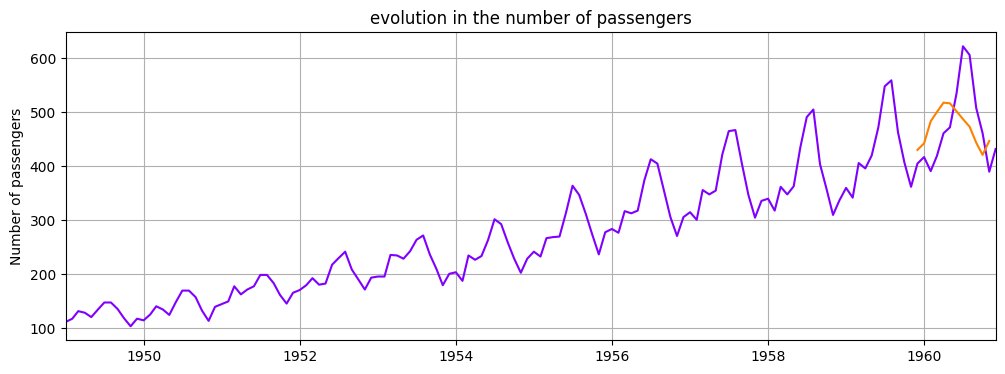

Epoch: 43 Loss: 0.00062064


<Figure size 1000x300 with 0 Axes>

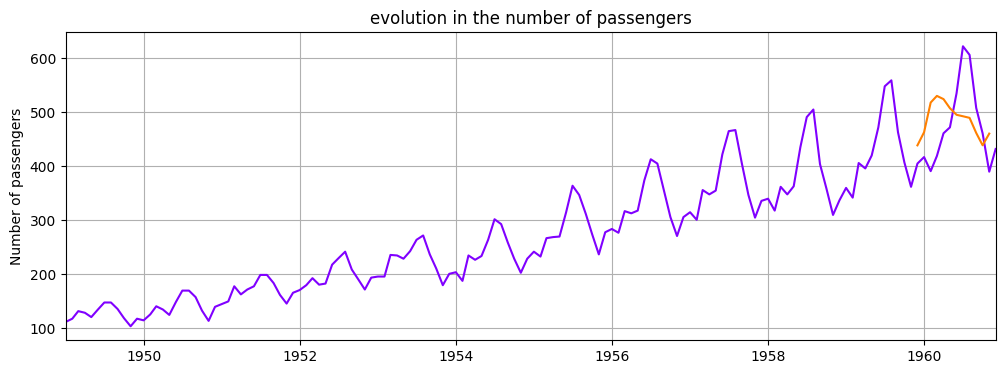

Epoch: 44 Loss: 0.00323918


<Figure size 1000x300 with 0 Axes>

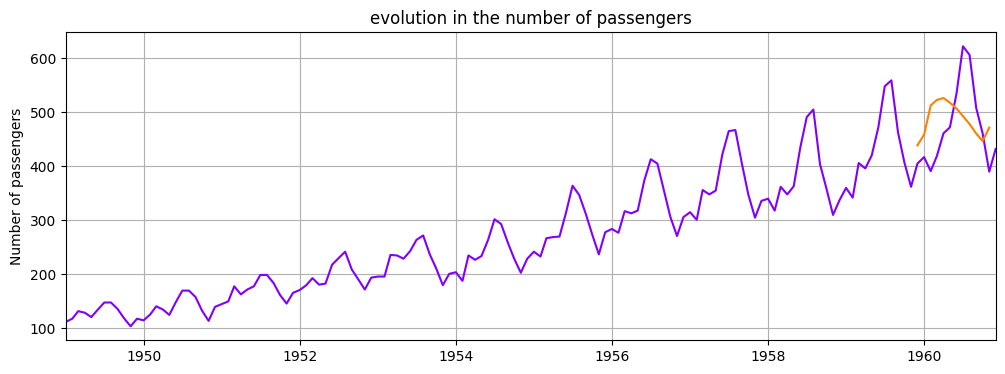

Epoch: 45 Loss: 0.00136624


<Figure size 1000x300 with 0 Axes>

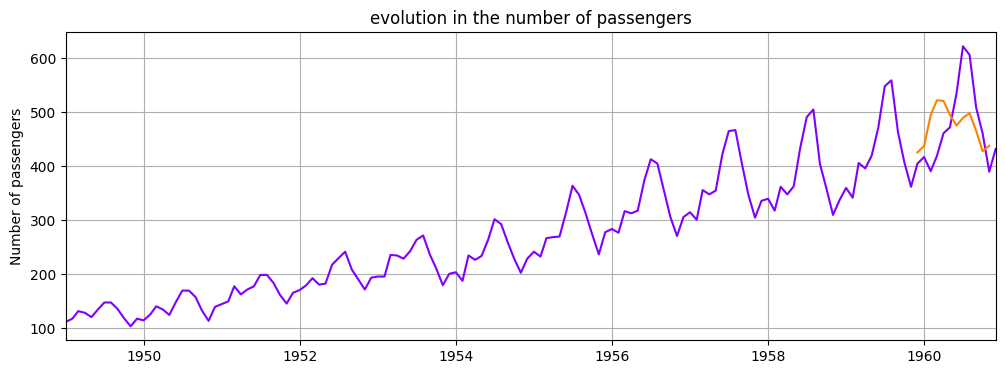

Epoch: 46 Loss: 0.00598943


<Figure size 1000x300 with 0 Axes>

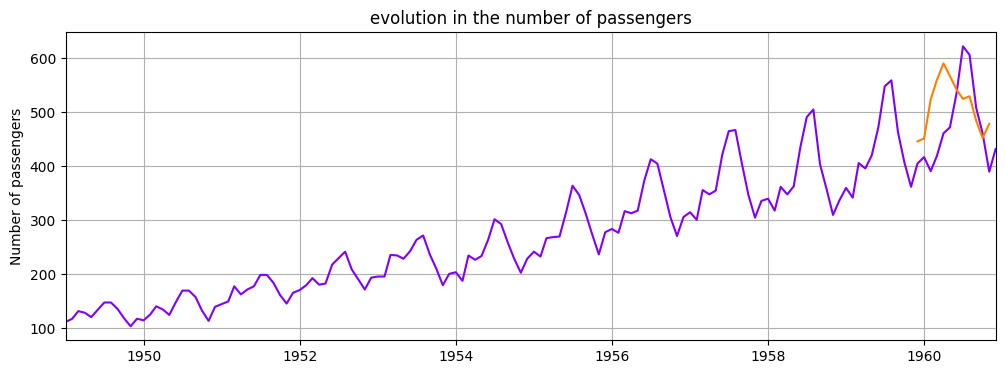

Epoch: 47 Loss: 0.00096628


<Figure size 1000x300 with 0 Axes>

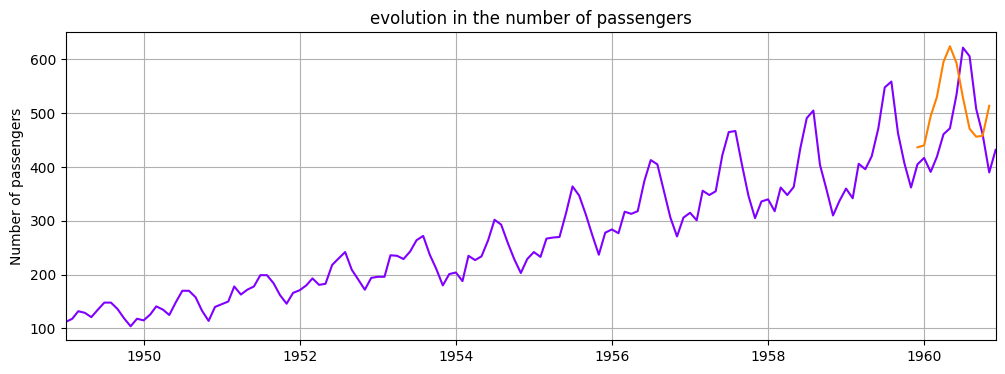

Epoch: 48 Loss: 0.01261782


<Figure size 1000x300 with 0 Axes>

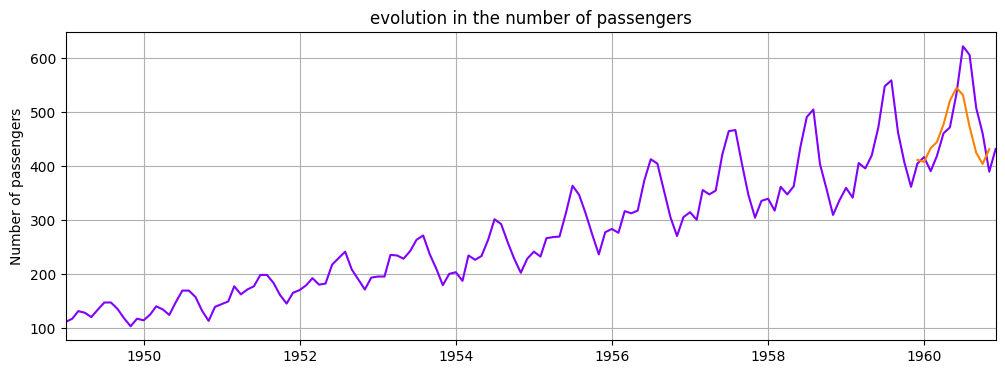

Epoch: 49 Loss: 0.00064382


<Figure size 1000x300 with 0 Axes>

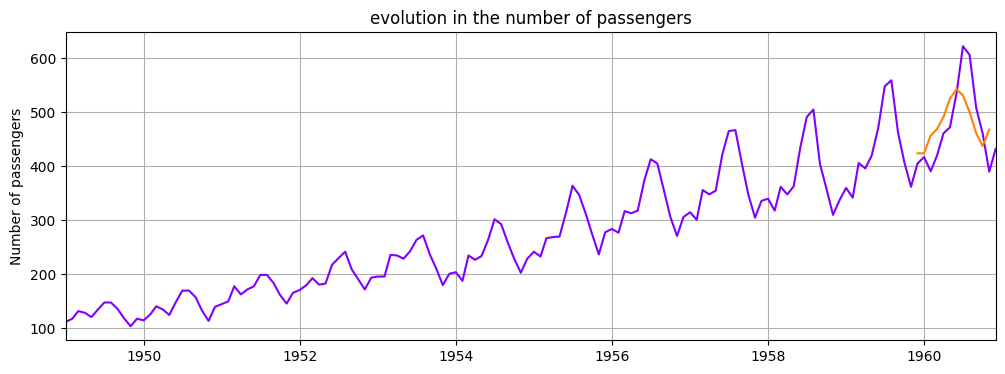

Epoch: 50 Loss: 0.00271763


<Figure size 1000x300 with 0 Axes>

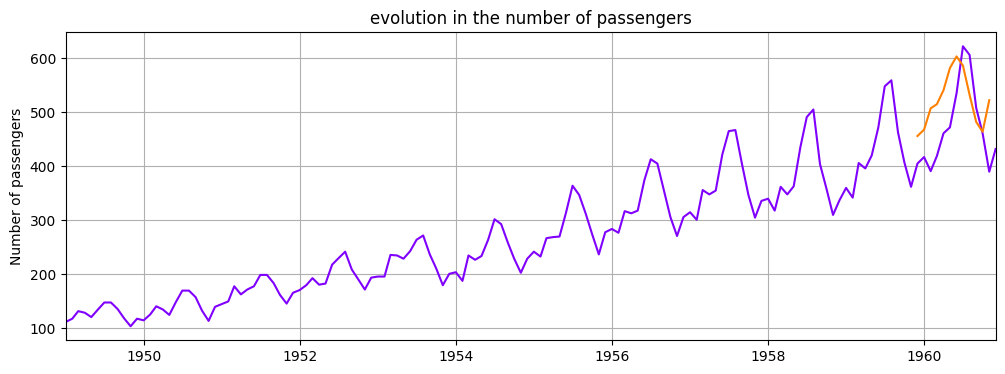

Epoch: 51 Loss: 0.00030926


<Figure size 1000x300 with 0 Axes>

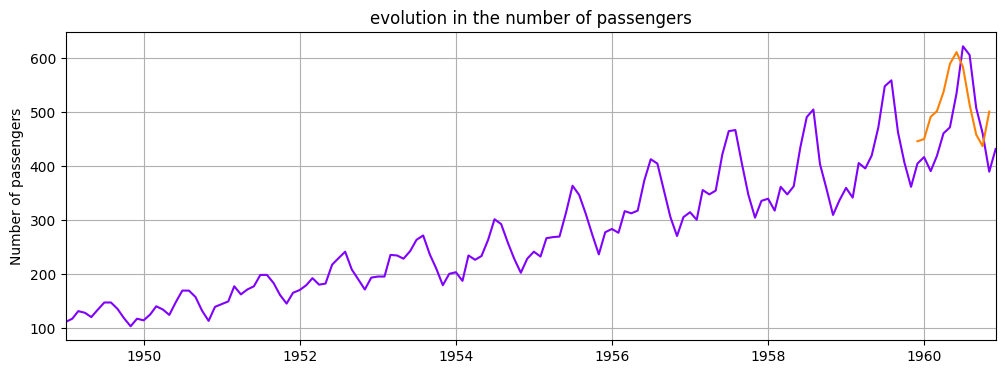

Epoch: 52 Loss: 0.00012530


<Figure size 1000x300 with 0 Axes>

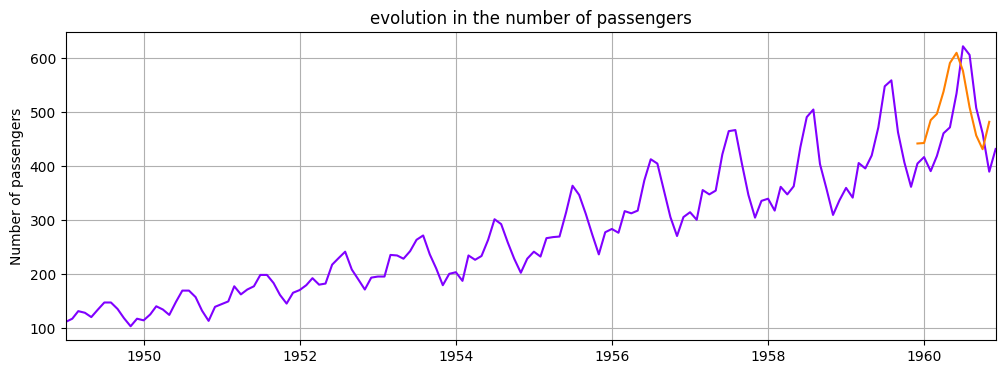

Epoch: 53 Loss: 0.00245708


<Figure size 1000x300 with 0 Axes>

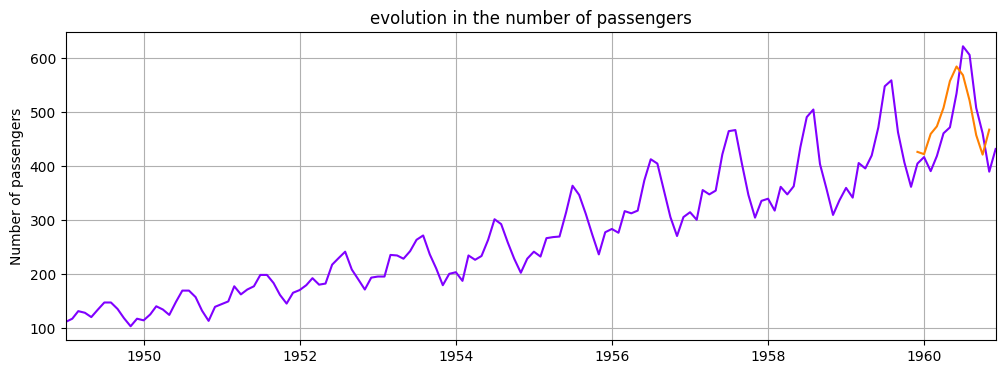

Epoch: 54 Loss: 0.00007593


<Figure size 1000x300 with 0 Axes>

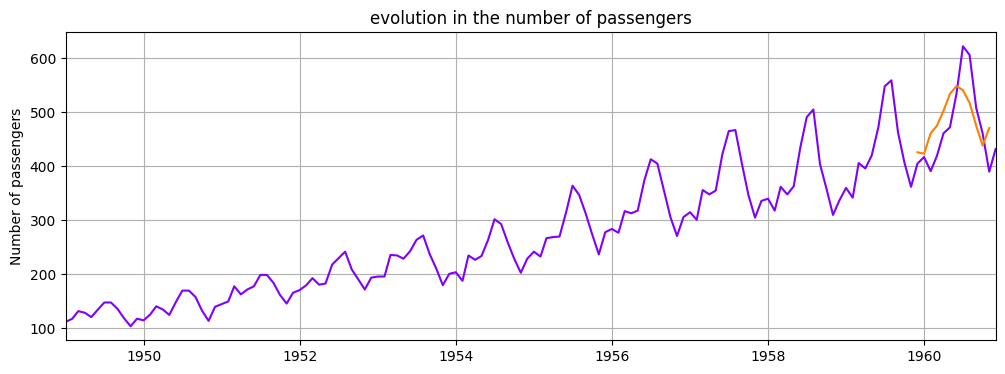

Epoch: 55 Loss: 0.00672479


<Figure size 1000x300 with 0 Axes>

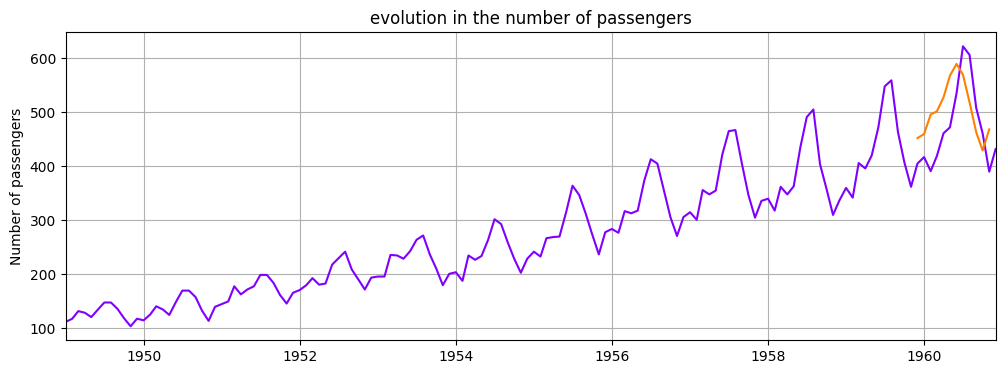

Epoch: 56 Loss: 0.00127255


<Figure size 1000x300 with 0 Axes>

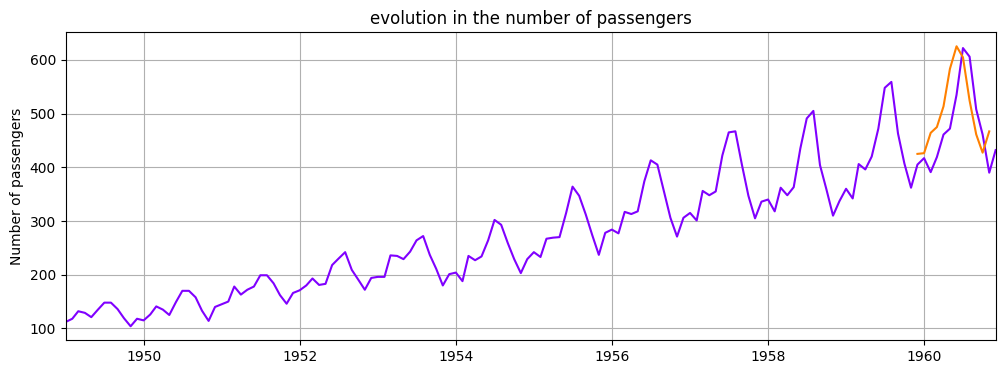

Epoch: 57 Loss: 0.00063743


<Figure size 1000x300 with 0 Axes>

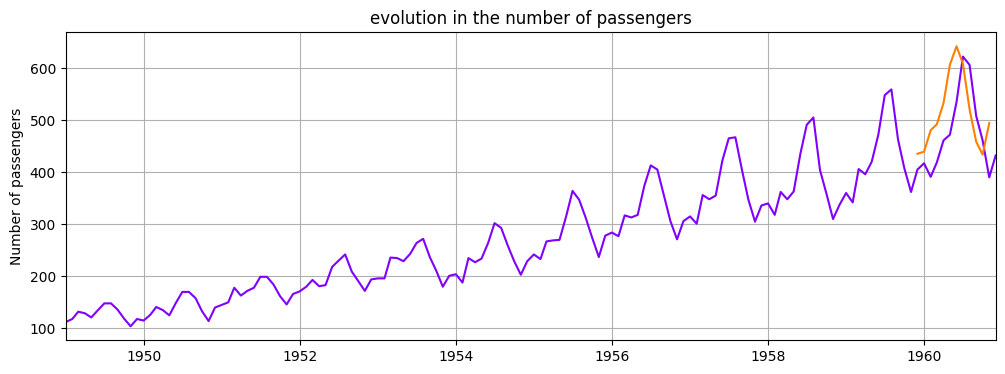

Epoch: 58 Loss: 0.00365853


<Figure size 1000x300 with 0 Axes>

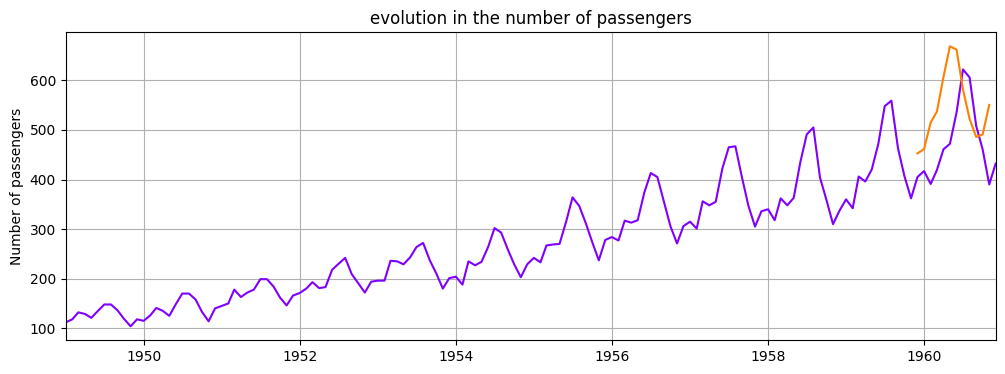

Epoch: 59 Loss: 0.00004050


<Figure size 1000x300 with 0 Axes>

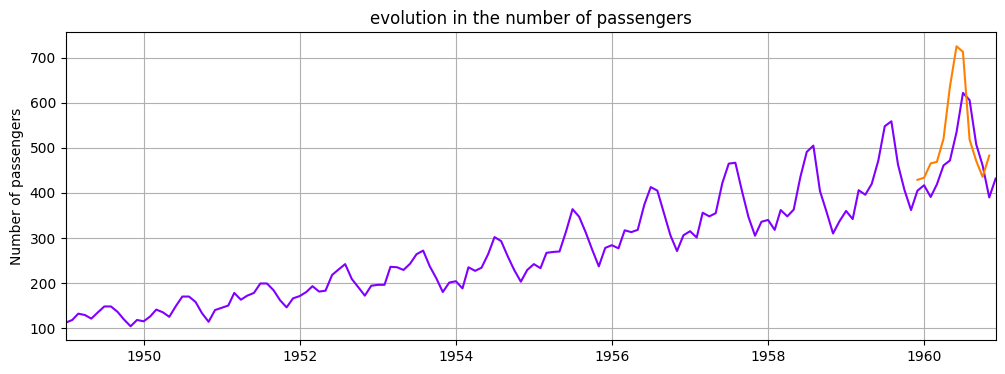

Epoch: 60 Loss: 0.00409164


<Figure size 1000x300 with 0 Axes>

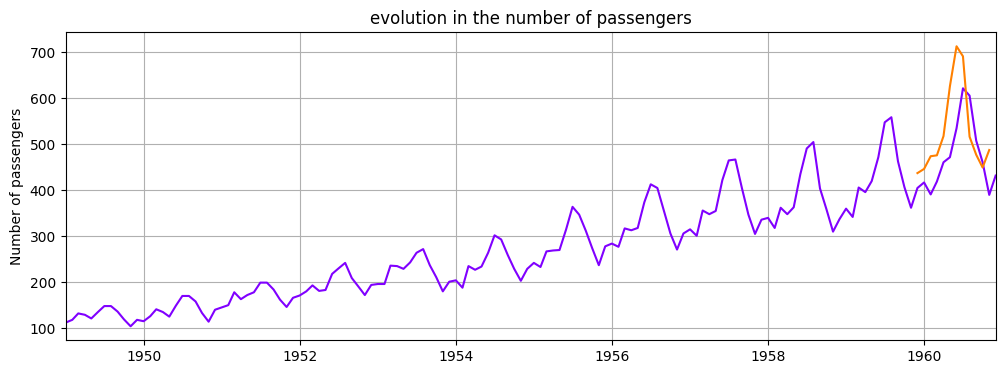

Epoch: 61 Loss: 0.00142319


<Figure size 1000x300 with 0 Axes>

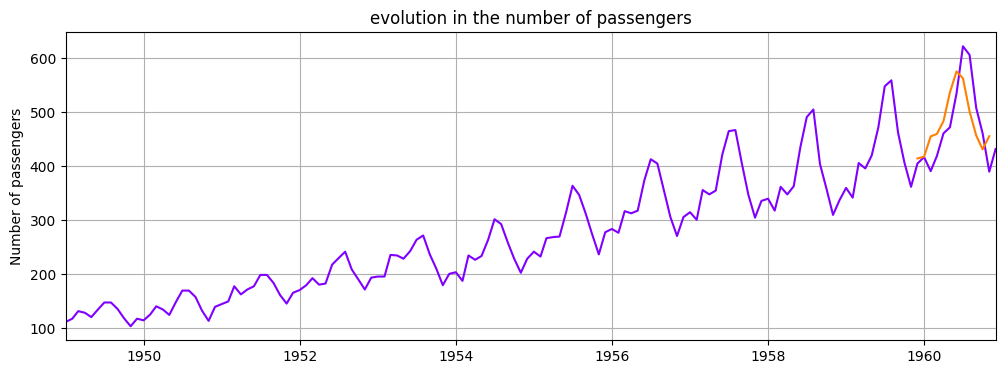

Epoch: 62 Loss: 0.00182767


<Figure size 1000x300 with 0 Axes>

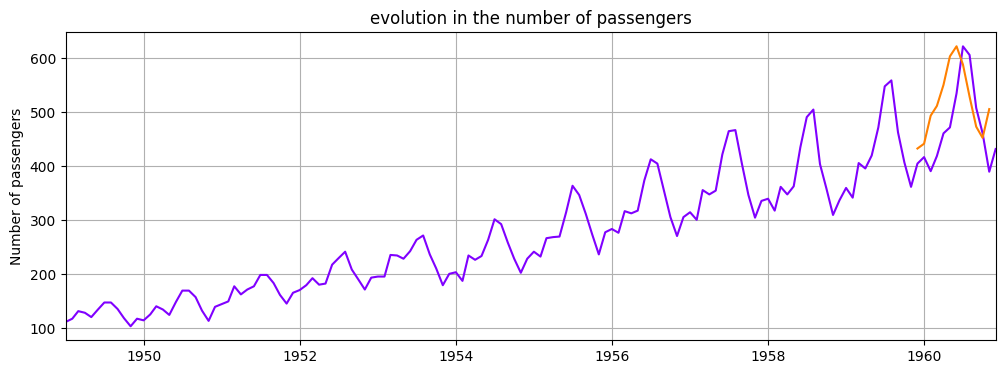

Epoch: 63 Loss: 0.00219545


<Figure size 1000x300 with 0 Axes>

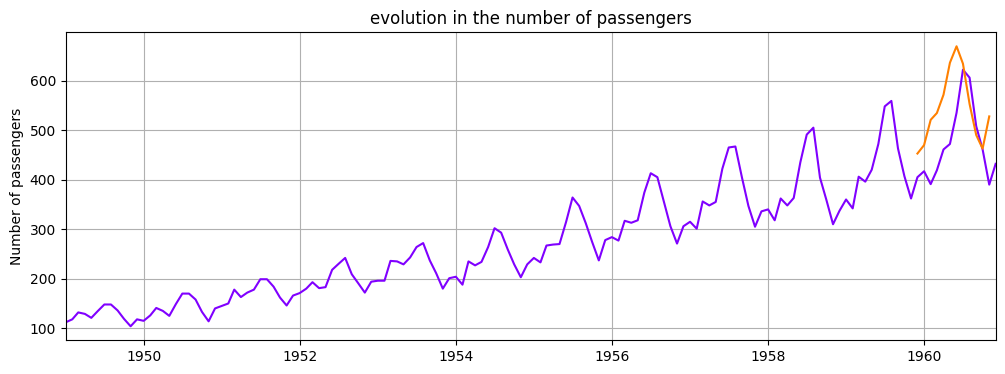

Epoch: 64 Loss: 0.00156518


<Figure size 1000x300 with 0 Axes>

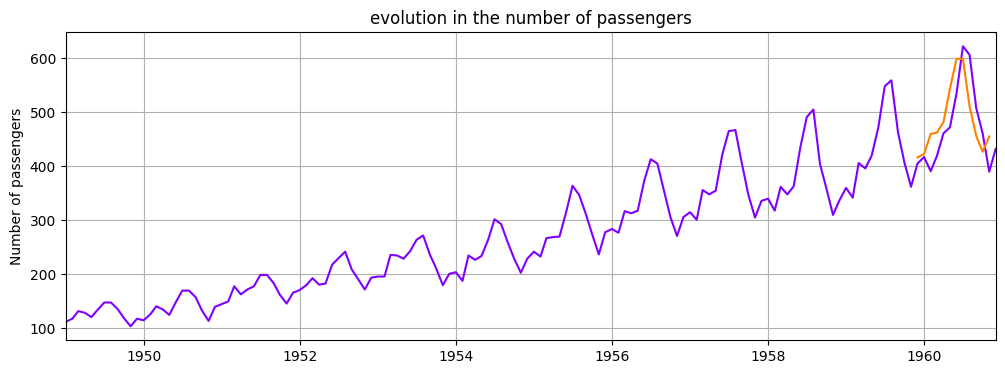

Epoch: 65 Loss: 0.00000303


<Figure size 1000x300 with 0 Axes>

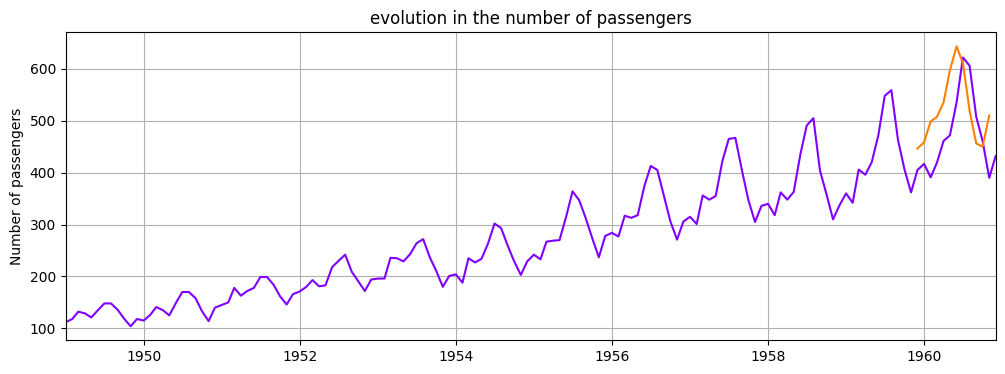

Epoch: 66 Loss: 0.01945610


<Figure size 1000x300 with 0 Axes>

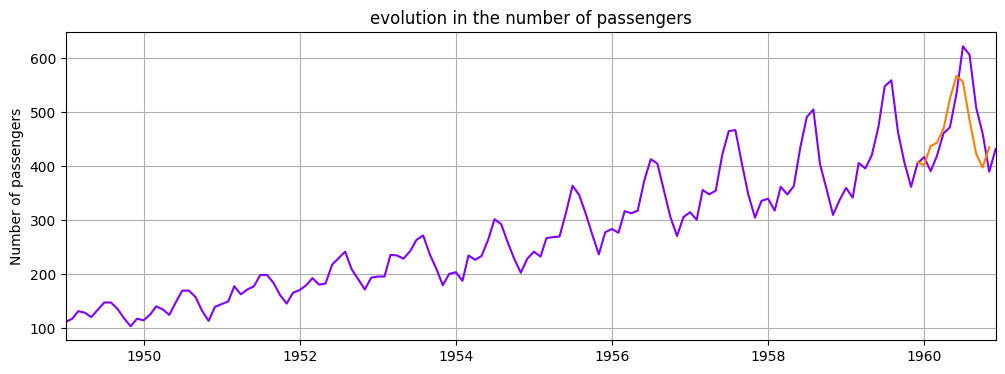

Epoch: 67 Loss: 0.00048549


<Figure size 1000x300 with 0 Axes>

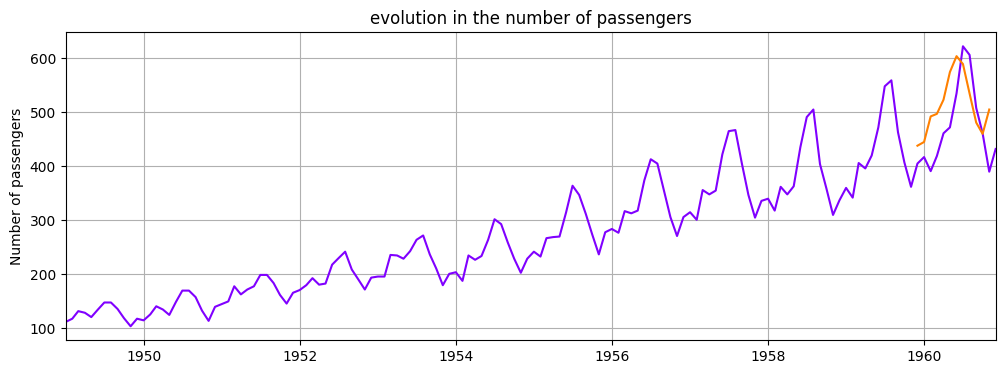

Epoch: 68 Loss: 0.00243544


<Figure size 1000x300 with 0 Axes>

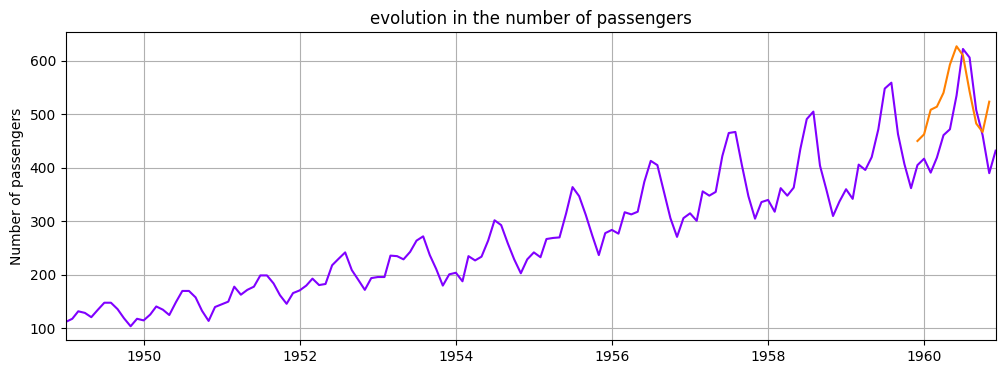

Epoch: 69 Loss: 0.00057929


<Figure size 1000x300 with 0 Axes>

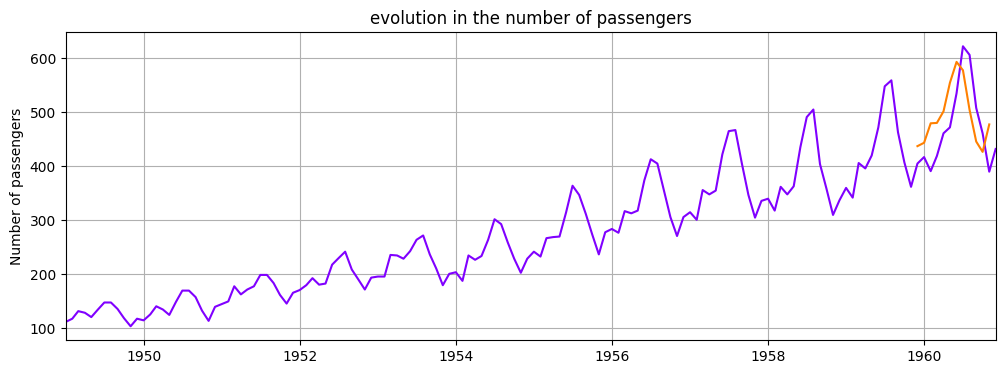

Epoch: 70 Loss: 0.00025093


<Figure size 1000x300 with 0 Axes>

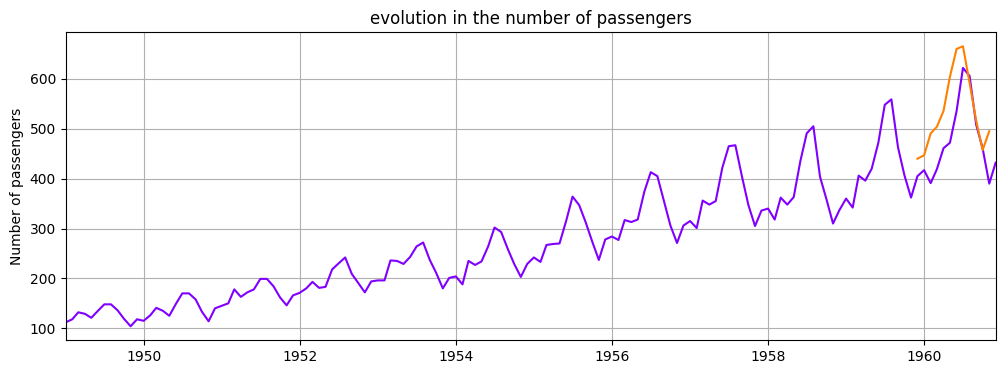

Epoch: 71 Loss: 0.00407311


<Figure size 1000x300 with 0 Axes>

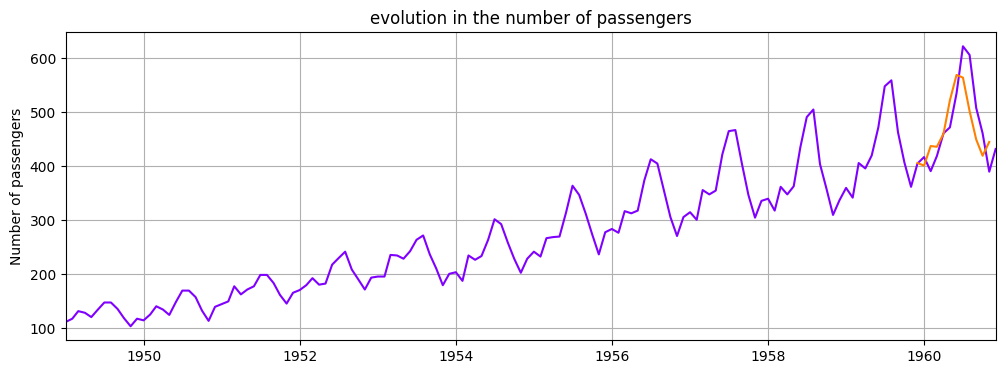

Epoch: 72 Loss: 0.00175297


<Figure size 1000x300 with 0 Axes>

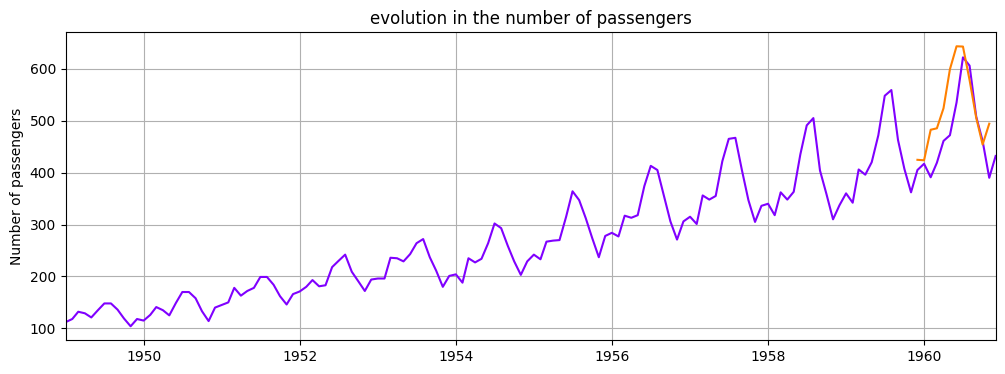

Epoch: 73 Loss: 0.00008798


<Figure size 1000x300 with 0 Axes>

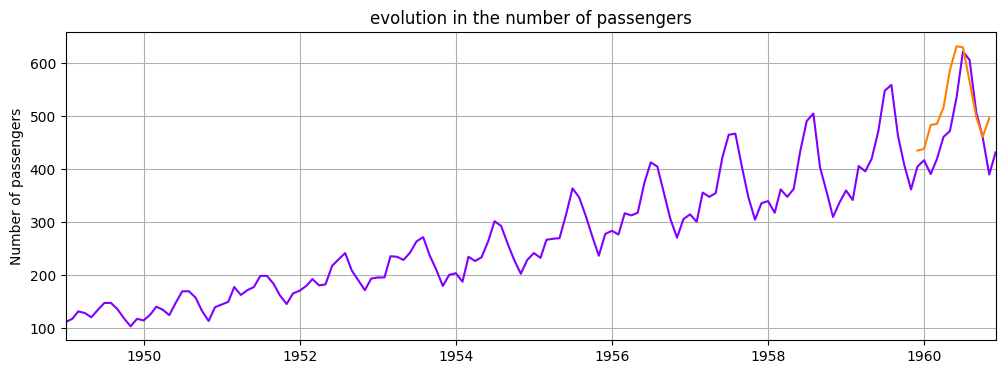

Epoch: 74 Loss: 0.00007158


<Figure size 1000x300 with 0 Axes>

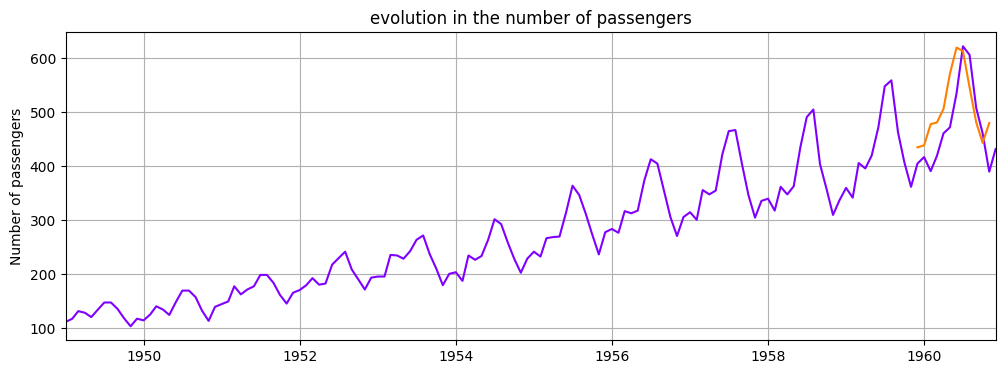

Epoch: 75 Loss: 0.00002767


<Figure size 1000x300 with 0 Axes>

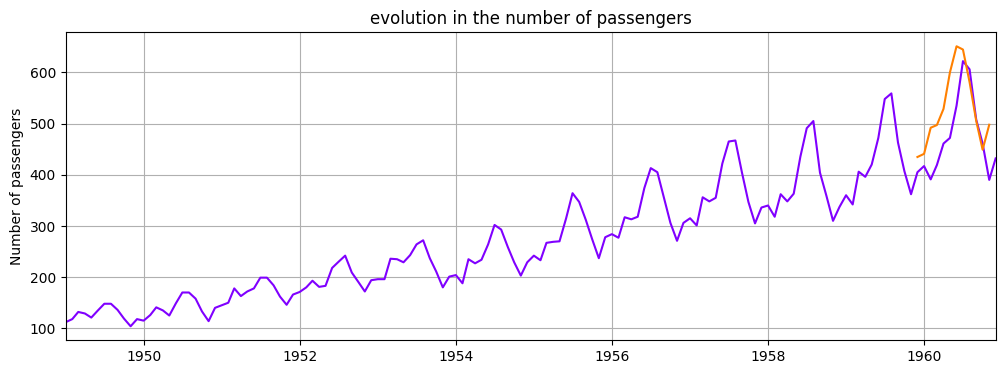


Duration: 61 seconds


In [14]:

import time
start_time = time.time()

for epoch in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(num_layers,1,model.hidden_size),
                        torch.zeros(num_layers,1,model.hidden_size))

        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')

    future = 12

    preds = train_norm[-window_size:].tolist()

    model.eval()

    for i in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(num_layers,1,model.hidden_size),
                            torch.zeros(num_layers,1,model.hidden_size))
            preds.append(model(seq).item())
    preds[window_size:]

    true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))

    plt.figure(figsize = (10,3))
    x = np.arange('1959-12', '1960-12', dtype='datetime64[M]').astype('datetime64[D]')
    plt.figure(figsize=(12,4))
    plt.title('evolution in the number of passengers')
    plt.ylabel('Number of passengers')
    plt.grid(True)
    plt.autoscale(axis='x',tight=True)
    plt.plot(df['#Passengers'], color='#8000ff')
    plt.plot(x, true_predictions, color='#ff8000')
    plt.show()

print(f'\nDuration: {time.time() - start_time:.0f} seconds')



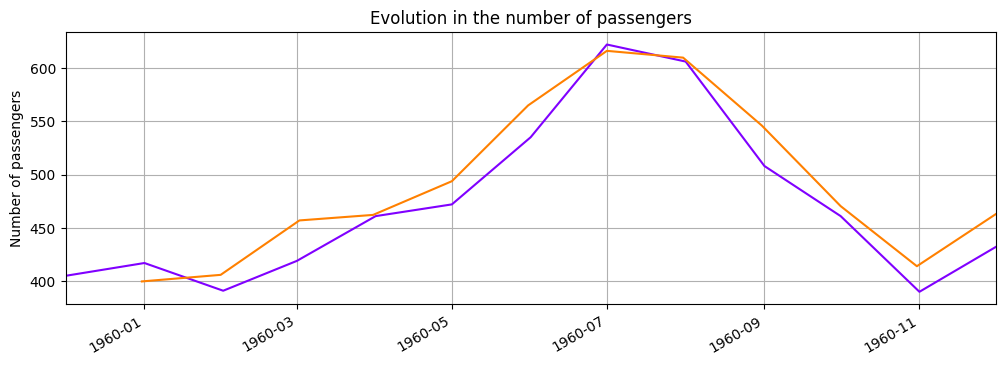

In [15]:
fig = plt.figure(figsize=(12,4))
x = np.arange('1959-12', '1960-12', dtype='datetime64[M]').astype('datetime64[D]')
plt.title('Evolution in the number of passengers')
plt.ylabel('Number of passengers')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['#Passengers']['1959-12':], color='#8000ff')
plt.plot(x+30,true_predictions-35, color='#ff8000')
#plt.savefig('/content/drive/MyDrive/RNNs_teste/best_prevision_passangers.png')
#plt.show()



### Obs: Best initializing hyperparameters of LSTM to Passengers data:

#### input_size = 1
#### hidden_size = 100
#### num_layers = 1
#### output_size = 1
#### learning_rate = 0.01
#### epochs = 75

### 6) New forecast for 1961-01:

In [16]:
# Evaluate the model
model.eval()

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [17]:
# instantiate a scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# normalize df data (full data)
new_seq = scaler.fit_transform(np.array([df['#Passengers']]).reshape(-1, 1))

In [18]:
# Necessary transformation:
n_seq = torch.FloatTensor(new_seq)

In [19]:
# Pass the data into the model in evaluation mode
new_predict = model.forward(n_seq)

In [20]:
# Normalized prediction:
new_predict

tensor([0.6110], grad_fn=<SelectBackward0>)

In [21]:
# Necessary transformation:
new_predictions = new_predict.detach().cpu().numpy().reshape(-1,1)

In [22]:
# Necessary transformation:
new_predictions = scaler.inverse_transform(new_predictions.reshape(-1, 1))

In [23]:
# Prediction with real scale:
new_predictions

array([[521.24084]], dtype=float32)

In [24]:
int(new_predictions)

<ipython-input-24-3c7f50513e78>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(new_predictions)


521

## Obs: the predict for 1961-01 is: 521 passengers!!!




In [25]:
type(new_predictions)

numpy.ndarray

In [26]:
df.loc['1961-01-01'] = int(new_predictions)

<ipython-input-26-a788751f6924>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df.loc['1961-01-01'] = int(new_predictions)


In [27]:
df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:40: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_with_columns = df.reset_index() if df.index.name else df


#Passengers
Month                           
1949-01-01 00:00:00          112
1949-02-01 00:00:00          118
1949-03-01 00:00:00          132
1949-04-01 00:00:00          129
1949-05-01 00:00:00          121
...                          ...
1960-09-01 00:00:00          508
1960-10-01 00:00:00          461
1960-11-01 00:00:00          390
1960-12-01 00:00:00          432
1961-01-01                   521

[145 rows x 1 columns]

### Little problems!

### Obs1: Concertar o "DeprecationWarning" quando é adicionado a previsão no banco de dados

### Obs2: Concertar o timer (00:00:00) gerado no Dataframe df

### Apesar desses alertas, o código funciona normalmente!!!

## 7) Plotting with new prevision in 1961-01

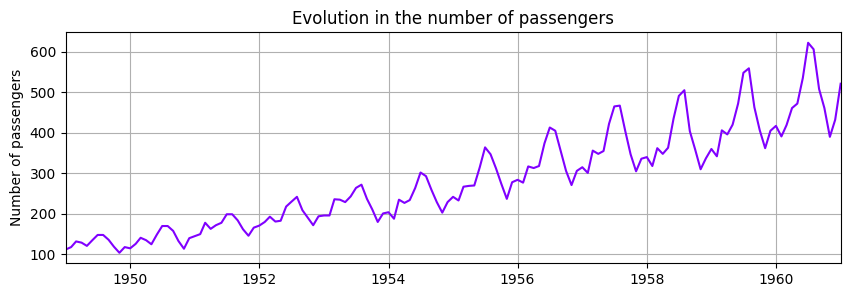

In [28]:
plt.figure(figsize = (10,3))
x = np.arange('1949-01', '1961-02', dtype='datetime64[M]').astype('datetime64[D]')

plt.title('Evolution in the number of passengers')
plt.ylabel('Number of passengers')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(x, df['#Passengers'], color='#8000ff')

plt.savefig('/content/drive/MyDrive/RNNs_teste/prevision_passangers_for_1961-01.png')
plt.show()


## End